## Introducción

A continuación realizaremos un análisis a un conjunto de datos de vuelos aéreos.

## Descripción del problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de
Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila
corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

●Fecha-I : Fecha y hora programada del vuelo.

● Vlo-I : Número de vuelo programado.

● Ori-I : Código de ciudad de origen programado.

● Des-I : Código de ciudad de destino programado.

● Emp-I : Código aerolínea de vuelo programado.

● Fecha-O : Fecha y hora de operación del vuelo.

● Vlo-O : Número de vuelo de operación del vuelo.

● Ori-O : Código de ciudad de origen de operación

● Des-O : Código de ciudad de destino de operación.

● Emp-O : Código aerolínea de vuelo operado.

● DIA : Día del mes de operación del vuelo.

● MES : Número de mes de operación del vuelo

● AÑO : Año de operación del vuelo.

● DIANOM : Día de la semana de operación del vuelo.

● TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

● OPERA : Nombre de aerolínea que opera.

● SIGLAORI : Nombre ciudad origen.

● SIGLADES : Nombre ciudad destino.

Debes resolver los siguientes puntos:

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

● temporada_alta :1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

● dif_min: diferencia en minutos entre Fecha-O y Fecha-I.

● atraso_15: 1 si dif_min > 15, 0 si no

● periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en
base a Fecha-I

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo
de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso
de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías
mejorar la performance?


## Pregunta 1.- Distribución de los datos

In [1]:
#Importe de librerias necesarias y configuraciones para comodidad de trabajo
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
from datetime import date

In [2]:
#Lectura de conjunto de datos
df=pd.read_csv("dataset_SCL.csv")
df.head(5)

C:\Users\nicolas.galvez\AppData\Local\Temp\ipykernel_25280\3608301715.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataset_SCL.csv")


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Limpieza de datos y análisis exploratorio

In [3]:
#Observacion df
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [4]:
#Observación de datos nulos
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [5]:
#Observación de tipos de datos
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [6]:
#Observación de datos nulos
df[df['Vlo-O'].isnull()==True]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [7]:
#Exploración de la variable Vlo-O
df['Vlo-O'].value_counts()

174      649
11       646
116      608
150      517
704      514
        ... 
356        1
1148       1
846A       1
4950       1
180.0      1
Name: Vlo-O, Length: 866, dtype: int64

In [8]:
#Exploración de la variable Vlo-I
df['Vlo-I'].value_counts()

174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64

Observamos cómo la variable número de vuelo operación no posee tan sólo vuelos identificados a través de números sino tambien vuelos identificados con con combinaciones entre letras y números. Lo mismo ocurre con la variable numero de vuelo programado.

In [9]:
#Observamos las filas del dataset donde el vuelo programado y el de la operación son distintos.
df[df['Vlo-I']!=df['Vlo-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,25,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt


#### Limpieza de datos

De la visualización anterior observamos que de los 68206 registros totales 1850 tienen datos distintos entre la columna Vlo-I y Vlo-O. En algunos casos notamos cómo corresponden al mismo registro escrito de manera distinta y en otros a información completamente distinta. Para eliminar el nulo existente lo rellenaremos con el dato de Vlo-I

In [10]:
#reemplazaremos el dato nulo por el valor de Vlo-I
df['Vlo-O']=np.where(df['Vlo-O'].isnull(),df['Vlo-I'],df['Vlo-O'])

In [11]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

#### Análisis Exploratorio

Nos interesa además comprender las diferencias existentes en las distintas variables que fueron programadas y ejecutadas posteriormente.

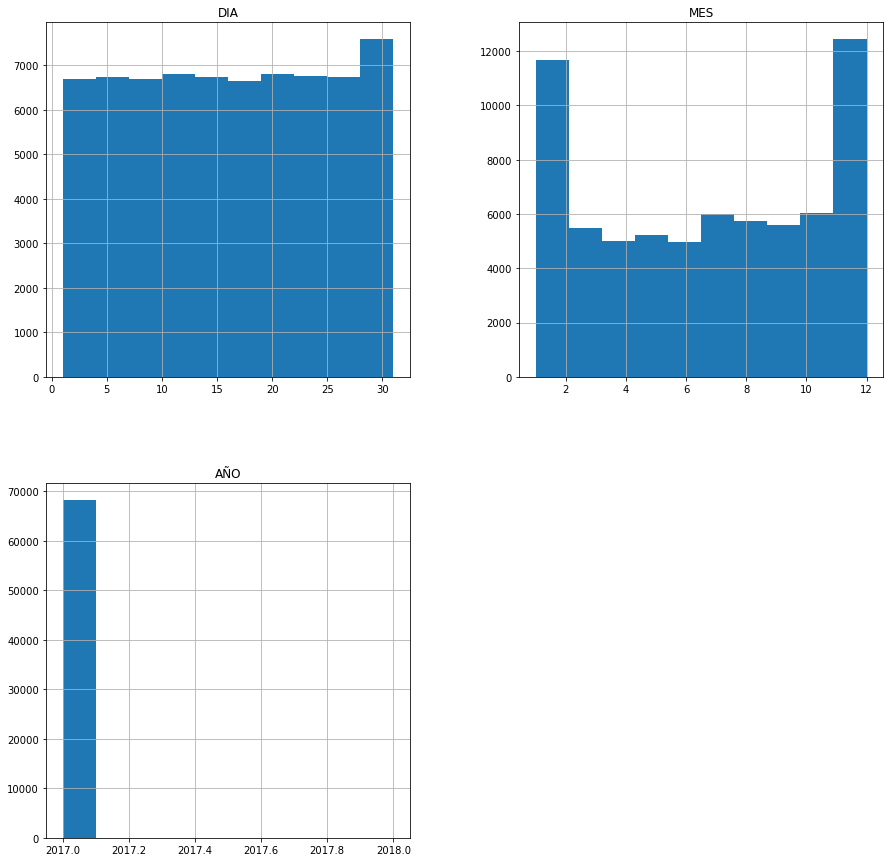

In [12]:
df.hist(figsize=(15,15));

In [13]:
# Observamos cómo existen vuelos cuyo número cambió al momento de ser ejecutado o existe diferencia en la manera de escribirlo
# cómo por ejemplo 265 y 265.0
df[df['Vlo-I']!=df['Vlo-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,25,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt


In [14]:
#Diferencia entre número de vuelo
len(df[df['Vlo-I']!=df['Vlo-O']])

1849

In [15]:
#Diferencia entre origenes
len(df[df['Ori-I']!=df['Ori-O']])

0

In [16]:
#Diferencia entre destinos
len(df[df['Des-I']!=df['Des-O']])

28

In [17]:
df[df['Emp-I']!=df['Emp-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
345,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,21,1,2017,Sabado,I,Austral,Santiago,Buenos Aires
814,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,1,1,2017,Domingo,I,Avianca,Santiago,Lima
815,2017-01-02 07:00:00,624,SCEL,SPJC,AVA,2017-01-02 07:05:00,624,SCEL,SPJC,LRC,2,1,2017,Lunes,I,Avianca,Santiago,Lima
816,2017-01-03 07:14:00,624,SCEL,SPJC,AVA,2017-01-03 07:14:00,624,SCEL,SPJC,LRC,3,1,2017,Martes,I,Avianca,Santiago,Lima
817,2017-01-04 07:00:00,624,SCEL,SPJC,AVA,2017-01-04 07:24:00,624,SCEL,SPJC,LRC,4,1,2017,Miercoles,I,Avianca,Santiago,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67877,2017-12-26 16:30:00,1033,SCEL,SCIE,LAW,2017-12-26 16:34:00,1033.0,SCEL,SCIE,JMR,26,12,2017,Martes,N,Latin American Wings,Santiago,Concepcion
67878,2017-12-27 16:30:00,1033,SCEL,SCIE,LAW,2017-12-27 16:30:00,1033.0,SCEL,SCIE,JMR,27,12,2017,Miercoles,N,Latin American Wings,Santiago,Concepcion
67879,2017-12-28 16:30:00,1033,SCEL,SCIE,LAW,2017-12-28 16:29:00,1033.0,SCEL,SCIE,JMR,28,12,2017,Jueves,N,Latin American Wings,Santiago,Concepcion
67880,2017-12-29 16:30:00,1033,SCEL,SCIE,LAW,2017-12-29 16:49:00,1033.0,SCEL,SCIE,JMR,29,12,2017,Viernes,N,Latin American Wings,Santiago,Concepcion


In [18]:
#Diferencia entre empresas ejecutoras
len(df[df['Emp-I']!=df['Emp-O']])

18669

In [19]:
#observamos la gran cantidad de vuelos distintos existentes y que son distintos entre lo programado y la operación
len(df['Vlo-I'].unique())

750

In [20]:
len(df['Vlo-O'].unique())

866

In [21]:
#observamos que todos los origenes son el mismo
len(df['Ori-I'].unique())

1

In [22]:
len(df['Ori-O'].unique())

1

In [23]:
#observamos diferencia en los destinos
len(df['Des-I'].unique())

64

In [24]:
len(df['Des-O'].unique())

63

In [25]:
#observamos diferencia en las empresas ejecutoras
len(df['Emp-I'].unique())

30

In [26]:
len(df['Emp-O'].unique())

32

De lo presentado anteriormente observamos como nunca existe variación en el origen dado que todos los vuelos son desde Santiago, pero si existen 28 casos donde hubo cambio en el destino, 1849 casos donde hubo cambios en el numero de vuelo o como vimos existen diferencias al manera de escribirlo y 18669 casos donde la empresa ejecutora cambió.

##### Gráficos

##### Análisis por empresa

In [27]:
df['Emp-I'].value_counts().index

Index(['LAN', 'SKU', 'TAM', 'ARG', 'CMP', 'LAW', 'AVA', 'JAT', 'GLO', 'AAL',
       'ACA', 'IBE', 'AFR', 'DAL', 'AMX', 'UAL', 'ONE', 'AZA', 'KLM', 'LAP',
       'BAW', 'QFU', 'JMR', 'LRC', 'AUT', 'PUE', 'LXP', 'LPE', 'DSM', 'LNE'],
      dtype='object')

In [28]:
df['Emp-O'].value_counts().index

Index(['LAN', 'LXP', 'SKU', 'TAM', 'ARG', 'CMP', 'JMR', 'LPE', 'JAT', 'AVA',
       'GLO', 'AAL', 'ACA', 'DSM', 'LNE', 'IBE', 'AFR', 'DAL', 'LRC', 'AMX',
       'UAL', 'ONE', 'AZA', 'KLM', 'LAP', 'BAW', 'QFA', 'AUT', 'PUE', '56R',
       '48O', 'TPU'],
      dtype='object')

Observamos que existen diferencias entre las empresas existentes en la programación y las ejecutoras por lo que haremos visualizaciones para todas ellas.

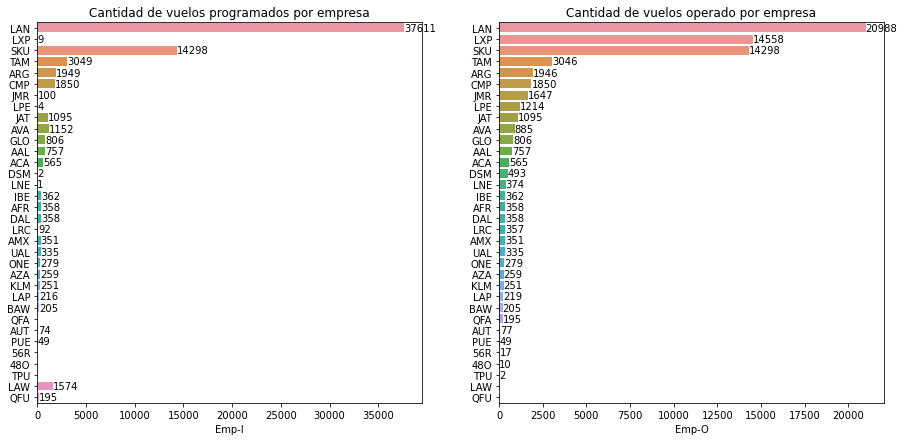

In [29]:
plt.figure(figsize=(40,7))
orden=pd.concat([(pd.DataFrame(data=df['Emp-O'].value_counts().reset_index())),(pd.DataFrame(data=df['Emp-I'].value_counts().reset_index()))],ignore_index=True)['index'].unique()
plt.subplot(151)
plt.title('Cantidad de vuelos programados por empresa')
ax=sns.barplot(y=df['Emp-I'].value_counts().index,x=df['Emp-I'].value_counts(),order=orden)
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
plt.subplot(152)
plt.title('Cantidad de vuelos operado por empresa')
ax2=sns.barplot(y=df['Emp-O'].value_counts().index,x=df['Emp-O'].value_counts(),order=orden)
labels = ax2.bar_label(ax2.containers[0],size=10,padding=0)


Lo primero que notamos al realizar esta visualización es que existen 37611 vuelos programados en LAN pero finalmente termina ejecutando 20988. Pensamos que finalmente los vuelos son reprogramados con otras empresas. Además nos resulta llamativo que la empresa QFU tenga 195 vuelos programados y 0 operados mientras que la empresa QFA tiene los mismos números a la inversa. Pensamos que quizás existe un error de tipografia en el sistema por lo seria interesante revisarlo. 

In [30]:
#generamos tabla pivoteada para observar de los vuelos programados que empresas los ejecutan.
tabla_emp=pd.crosstab(index=df['Emp-I'], columns=df['Emp-O'])
tabla_emp

Emp-O,48O,56R,AAL,ACA,AFR,AMX,ARG,AUT,AVA,AZA,BAW,CMP,DAL,DSM,GLO,IBE,JAT,JMR,KLM,LAN,LAP,LNE,LPE,LRC,LXP,ONE,PUE,QFA,SKU,TAM,TPU,UAL
Emp-I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,0,0,757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACA,0,0,0,565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AFR,0,0,0,0,358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AMX,0,0,0,0,0,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ARG,0,0,0,0,0,0,1944,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AUT,0,0,0,0,0,0,2,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AVA,0,0,0,0,0,0,0,0,885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,265,0,0,0,0,0,0,2,0
AZA,0,0,0,0,0,0,0,0,0,259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAW,0,0,0,0,0,0,0,0,0,0,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


De la tabla pivoteada observamos que:


-Nuestras sospechas respecto a la empresa QFU en realidad a la hora de la ejecución se llama QFA son verdaderas.

-3 de los vuelos programados por TAM fueron tomados por LAP.

-Observamos que los vuelos de progamados por LAW son en su mayoria ejecutados por JMR pero además interfiere 48O y 56R.

-Respecto a LAN 20988 de sus vuelos programados fueron ejecutados por ellos mismos mientras que 14549 fueron ejecutados por LXP, 1210 por LPE, 491 por DSM y 373 por LNE.

-Si observamos a AVA 885 fueron ejecutados por ellos, 265 por LRC y 2 por TPU.

-De AUT 2 de sus vuelos fueron ejecutados por ARG.

-De ARG 5 fueron ejecutados por AUT.

Esto resulta relevante a la hora de querer realizar una predicción sabiendo sólo la programación de los vuelos ya que algunos de esos vuelos son ejecutados por empresas distintas a las programadas.




##### Análisis por destinos

In [31]:
df['Des-I'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCVD', 'SCQP', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'SANT', 'YMML', 'SEQU',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI'],
      dtype=object)

In [32]:
df['Des-O'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCQP', 'SCVD', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'KIAD', 'SANT', 'YMML',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB'],
      dtype=object)

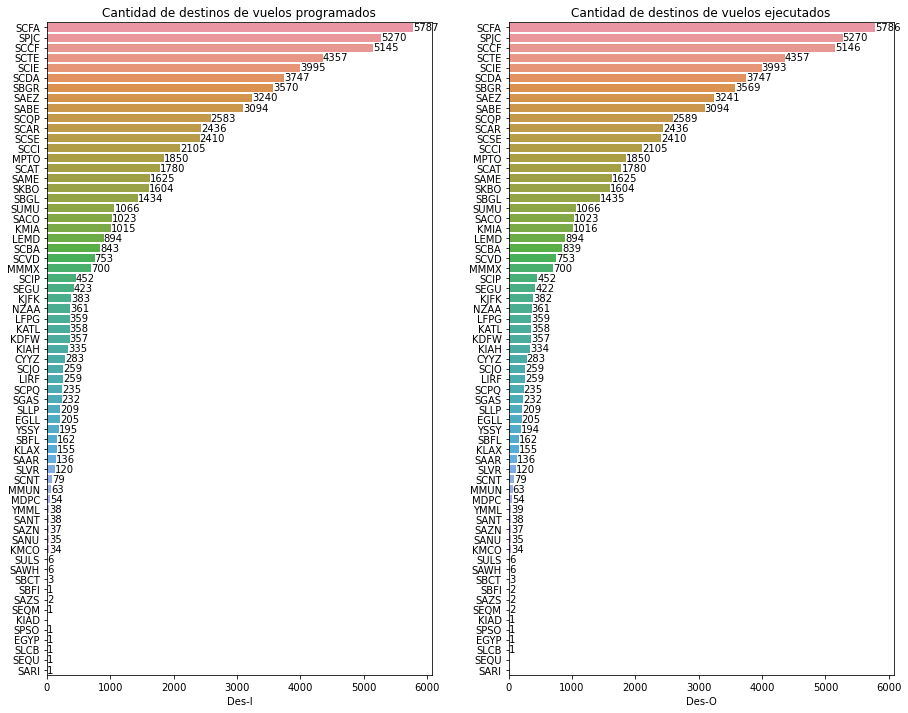

In [33]:
plt.figure(figsize=(40,12))
orden=pd.concat([(pd.DataFrame(data=df['Des-O'].value_counts().reset_index())),(pd.DataFrame(data=df['Des-I'].value_counts().reset_index()))],ignore_index=True)['index'].unique()
plt.subplot(151)
plt.title('Cantidad de destinos de vuelos programados')
ax=sns.barplot(y=df['Des-I'].value_counts().index,x=df['Des-I'].value_counts(),order=orden)
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
plt.subplot(152)
plt.title('Cantidad de destinos de vuelos ejecutados')
ax2=sns.barplot(y=df['Des-O'].value_counts().index,x=df['Des-O'].value_counts(),order=orden)
labels = ax2.bar_label(ax2.containers[0],size=10,padding=0)

Observamos que existen diferencias entre los destinos programados y los ejecutados por lo que realizaremos una tabla pivoteada para revisarlas.


In [34]:
#generamos tabla pivoteada para observar las diferencias de destinos.
pd.set_option('display.max_rows',None)
tabla_des=pd.crosstab(index=df['Des-I'], columns=df['Des-O'])
tabla_des

Des-O,CYYZ,EGLL,EGYP,KATL,KDFW,KIAD,KIAH,KJFK,KLAX,KMCO,KMIA,LEMD,LFPG,LIRF,MDPC,MMMX,MMUN,MPTO,NZAA,SAAR,SABE,SACO,SAEZ,SAME,SANT,SANU,SAWH,SAZN,SAZS,SBCT,SBFI,SBFL,SBGL,SBGR,SCAR,SCAT,SCBA,SCCF,SCCI,SCDA,SCFA,SCIE,SCIP,SCJO,SCNT,SCPQ,SCQP,SCSE,SCTE,SCVD,SEGU,SEQM,SGAS,SKBO,SLCB,SLLP,SLVR,SPJC,SPSO,SULS,SUMU,YMML,YSSY
Des-I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CYYZ,283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EGLL,0,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EGYP,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KATL,0,0,0,358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KDFW,0,0,0,0,357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KIAH,0,0,0,0,0,1,334,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KJFK,0,0,0,0,0,0,0,382,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KLAX,0,0,0,0,0,0,0,0,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KMCO,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Los destinos de los vuelos tienen leves diferencias al momento de ser ejecutados. Observamos cómo en general si existe cambio en el destino programado ocurre una vez en cada uno de estos vuelos. El caso excepcional ocurre con el destino SABE que tiene 4 vuelos ejecutados en SAME.

In [35]:
pd.set_option('display.max_rows',60)

##### Análisis por fechas

Resulta interesante además visualizar cómo se distribuyen los datos de acuerdo a las fechas

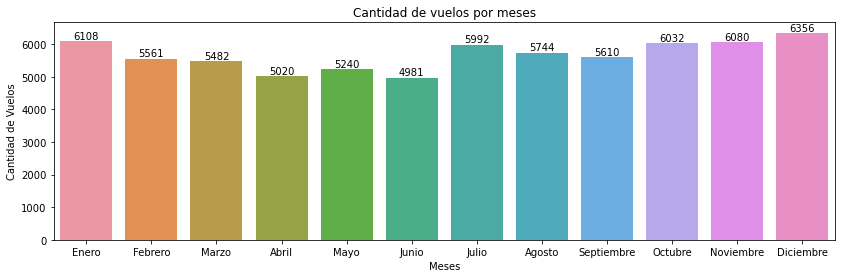

In [36]:
plt.figure(figsize=(14,4))
ax=sns.barplot(x=df['MES'].value_counts().index,y=df['MES'].value_counts())
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
ax.set_xticklabels(["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
plt.xlabel('Meses')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de vuelos por meses')
plt.show()

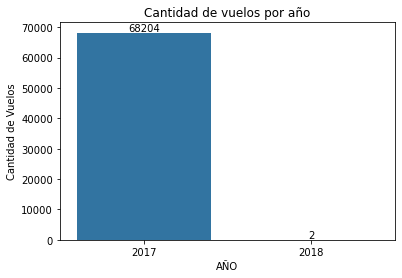

In [37]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x=df['AÑO'].value_counts().index,y=df['AÑO'].value_counts())
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
plt.xlabel('AÑO')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de vuelos por año')
plt.show()

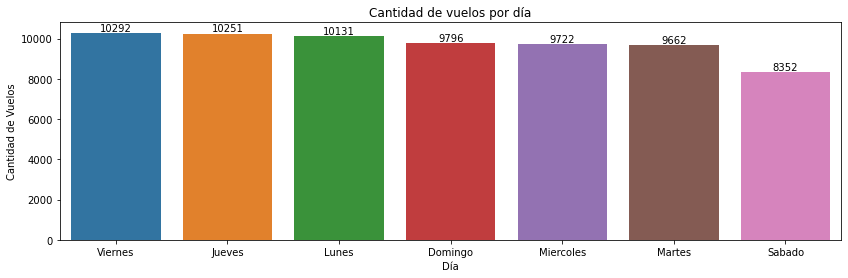

In [38]:
plt.figure(figsize=(14,4))
ax=sns.barplot(x=df['DIANOM'].value_counts().index,y=df['DIANOM'].value_counts())
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
plt.xlabel('Día')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de vuelos por día')
plt.show()

De los gráficos anteriores observamos que:

-Respecto a los meses observamos que la temporada en la que mas vuelos ocurren es durante Octubre a Enero seguido del mes de Julio, esto se podría explicar debido a los periodos de vacaciones.

-Respecto a los años en que tenemos datos son en su mayoria pertenecientes a 2017.

-Respecto a los días observamos cómo los días en que mas se viaja son los Viernes, Jueves y Lunes, mientras que los Sábados existe menos volumen de vuelos.

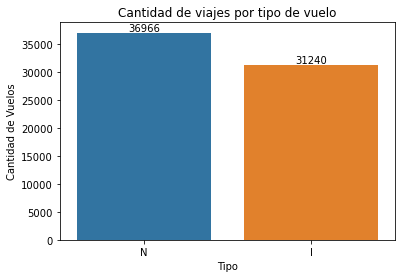

In [39]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x=df['TIPOVUELO'].value_counts().index,y=df['TIPOVUELO'].value_counts())
labels = ax.bar_label(ax.containers[0],size=10,padding=0)
plt.xlabel('Tipo')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de viajes por tipo de vuelo')
plt.show()

Finalmente observamos que existe un mayor volumen de vuelos nacionales en nuestro conjunto de datos.

#### Conclusiones del análisis exploratorio

-Observamos inicialmente que existen diferencias entre lo programado y lo ejecutado. Es específico, notamos cómo existen cambios en la numeración del vuelo, empresa ejecutora y destino.

-Respecto a las empresas ejecutas observamos que existen muchas empresas que tienen programados vuelos y que finalmente son ejecutados por otras. Desconocemos si corresponde a una negociación entre ellas para suplir vuelos que sobrepasan a la capacidad de la compañia u otra razón. Resultaría provechoso consultarlo con un experto del área para comprender el comportamiento de este dato.

-Además, encontramos a QFU donde todos sus vuelos fueron ejecutados por QFA. Pensamos que es la misma empresa con algún error al ser ingresada en el sistema. Tambien sería conveniente revisarlo con un experto.

-Existen cambios en los destinos de los vuelos. Son en su mayoria muy pequeños en volumen (1 en la mayoria de los casos). Destaca SABE con un cambio a SAME en 4 de sus viajes.

-Respecto a la distribución de los datos observamos que LAN es la empresa que ejecuta la mayor cantidad de vuelos pero muchos de sus vuelos son ejecutados por otras empresas. Esta reprogramación es relevante a la hora de hacer un pronóstico dado que si queremos utilizar solo información de la programación para realizar un modelo debemos considerar que no siempre la empresa que esté programada será la que ejecute realmente el vuelo y las variables como el atraso dependen directamente de la empresa ejecutora.

-Al realizar un análisis por fechas vimos que nuestros datos corresponden en su mayoria a 2017, donde la mayor cantidad de vuelos ocurrieron en el periodo Octubre-Enero y en Julio. Si revisamos los días de la semana, los días en que más vuelos ocurres son los Viernes, Jueves y Lunes en orden descendente.

-Finalmente, los vuelos en su mayoria son de carácter nacional (36966).

##  Pregunta 2.- Creación de variables auxiliares

Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv : 

● temporada_alta :1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

● dif_min: diferencia
en minutos entre Fecha-O y Fecha-I.

● atraso_15: 1 si dif_min > 15, 0 si no

● periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I

In [40]:
#transformación de los datos fecha a formato fecha
#funcion para conversion
def conv_fecha(x):
        return datetime.strptime(x,"%Y-%m-%d %H:%M:%S")

In [41]:
df['Fecha-I']= df['Fecha-I'].astype(str).apply(lambda x: conv_fecha(x))
df['Fecha-O']= df['Fecha-O'].astype(str).apply(lambda x: conv_fecha(x))

In [42]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [43]:
df['Fecha-I'].describe()

C:\Users\nicolas.galvez\AppData\Local\Temp\ipykernel_25280\1005773805.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Fecha-I'].describe()


count                   68206
unique                  53252
top       2017-07-28 13:30:00
freq                        6
first     2017-01-01 00:15:00
last      2017-12-31 23:55:00
Name: Fecha-I, dtype: object

In [44]:
df['Fecha-O'].describe()

C:\Users\nicolas.galvez\AppData\Local\Temp\ipykernel_25280\2404728753.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Fecha-O'].describe()


count                   68206
unique                  62774
top       2017-11-05 14:51:00
freq                        5
first     2017-01-01 00:04:00
last      2018-01-01 00:12:00
Name: Fecha-O, dtype: object

Observamos como las fechas programadas solo corresponden al 2017 mientras que en las ejecutadas existen del 2018. Pensamos que se puede deber a un atraso en los vuelos.

In [45]:
#Creación de columna temporada alta
df['temporada_alta']=np.where(((df['Fecha-I']> pd.Timestamp(2017,7,15)) & (df['Fecha-I']< pd.Timestamp(2017,7,31)))
                              | ((df['Fecha-I']> pd.Timestamp(2017,9,11)) & (df['Fecha-I']< pd.Timestamp(2017,9,30)))
                              | ((df['Fecha-I']> pd.Timestamp(2017,12,15))
                              | (df['Fecha-I']< pd.Timestamp(2017,3,3))),1,0)

In [46]:
#Creación de columna de minutos de diferencia en vuelos
df['dif_min']=((df['Fecha-O']-df['Fecha-I']).dt.total_seconds())/60
df[['Fecha-I','Fecha-O','dif_min']]

,Fecha-I,Fecha-O,dif_min
0,2017-01-01 23:30:00,2017-01-01 23:33:00,3.0
1,2017-01-02 23:30:00,2017-01-02 23:39:00,9.0
2,2017-01-03 23:30:00,2017-01-03 23:39:00,9.0
3,2017-01-04 23:30:00,2017-01-04 23:33:00,3.0
4,2017-01-05 23:30:00,2017-01-05 23:28:00,-2.0
...,...,...,...
68201,2017-12-22 14:55:00,2017-12-22 15:41:00,46.0
68202,2017-12-25 14:55:00,2017-12-25 15:11:00,16.0
68203,2017-12-27 14:55:00,2017-12-27 15:35:00,40.0
68204,2017-12-29 14:55:00,2017-12-29 15:08:00,13.0


In [47]:
#Creación de columna de atraso
df['atraso_15']=np.where(df['dif_min']>15,1,0)

In [48]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0


In [49]:
#Creación de columna con horas
df['horas']=df['Fecha-I'].apply(lambda x: x.strftime('%H:%M:%S'))
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,horas
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,23:30:00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,23:30:00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,23:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,14:55:00
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,14:55:00
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,14:55:00
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,14:55:00


In [50]:
#Creación funcion periodo
def periodo(x):
    x = datetime.strptime(x, "%H:%M:%S").time()
    if (x >= datetime.strptime("05:00:00", "%H:%M:%S").time() and x<= datetime.strptime("11:59:59", "%H:%M:%S").time()):
        return('mañana')
    elif (x >= datetime.strptime("12:00:00", "%H:%M:%S").time() and x<= datetime.strptime("18:59:59", "%H:%M:%S").time()):
        return('tarde')
    elif (x >= datetime.strptime("19:00:00", "%H:%M:%S").time() or x<= datetime.strptime("04:59:59", "%H:%M:%S").time()):
        return('noche')

In [51]:
#Creación columna periodo
df['periodo_dia']=df['horas'].apply(lambda x: periodo(x))

In [52]:
df=df[['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia']]

In [53]:
df.to_csv('synthetic_features.csv')

## Pregunta 3.- Revisión de nuevas variables

Ahora que hemos generado nuevas variables, resulta interesante observar cómo se comportan de acuerdo a las que teniamos anteriormente. 

### Atraso por destino

In [54]:
#Definimos funcion para gráfico de variables de interés respecto al atraso
def atraso (variable,tamañox,tamañoy):
    df_iter=df.groupby(['{}'.format(variable),'atraso_15']).count().reset_index()[['{}'.format(variable),'atraso_15','Fecha-I']]
    df_iter['total']=0
    df_iter
    for pos,val in df_iter.iterrows():
        df_iter['total'][pos]=df_iter[df_iter['{}'.format(variable)]==val['{}'.format(variable)]]['Fecha-I'].sum()
    df_iter=df_iter.drop_duplicates('{}'.format(variable),keep='last')
    df_iter['porcentaje_atraso']=np.where(df_iter['atraso_15']==1,round((df_iter['Fecha-I']/df_iter['total'])*100,1),round((1-(df_iter['Fecha-I']/df_iter['total']))*100,1))
    plt.figure(figsize=(tamañox,tamañoy))
    ax=sns.lineplot(data=df_iter.sort_values(by='total',ascending=False), x='{}'.format(variable),y='total',color='black',label='Cantidad de vuelos totales')
    ax.set_ylabel("Cantidad de vuelos")
    ax.set_xlabel("{}".format(variable))
    ax2 = ax.twinx()
    ax2=sns.barplot(data=df_iter.sort_values(by='total',ascending=False),x='{}'.format(variable),y='porcentaje_atraso',alpha=0.7,label='Porcentaje de atraso por {}'.format(variable))
    ax2.set_ylabel("Porcentaje de atraso por {}".format(variable))
    ax2.set_xlabel("Empresa operadora")
    ax.set_xticklabels(df_iter.sort_values(by='total',ascending=False)['{}'.format(variable)], rotation = 90)
    ax2.set_xticklabels(df_iter.sort_values(by='total',ascending=False)['{}'.format(variable)], rotation = 90)
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

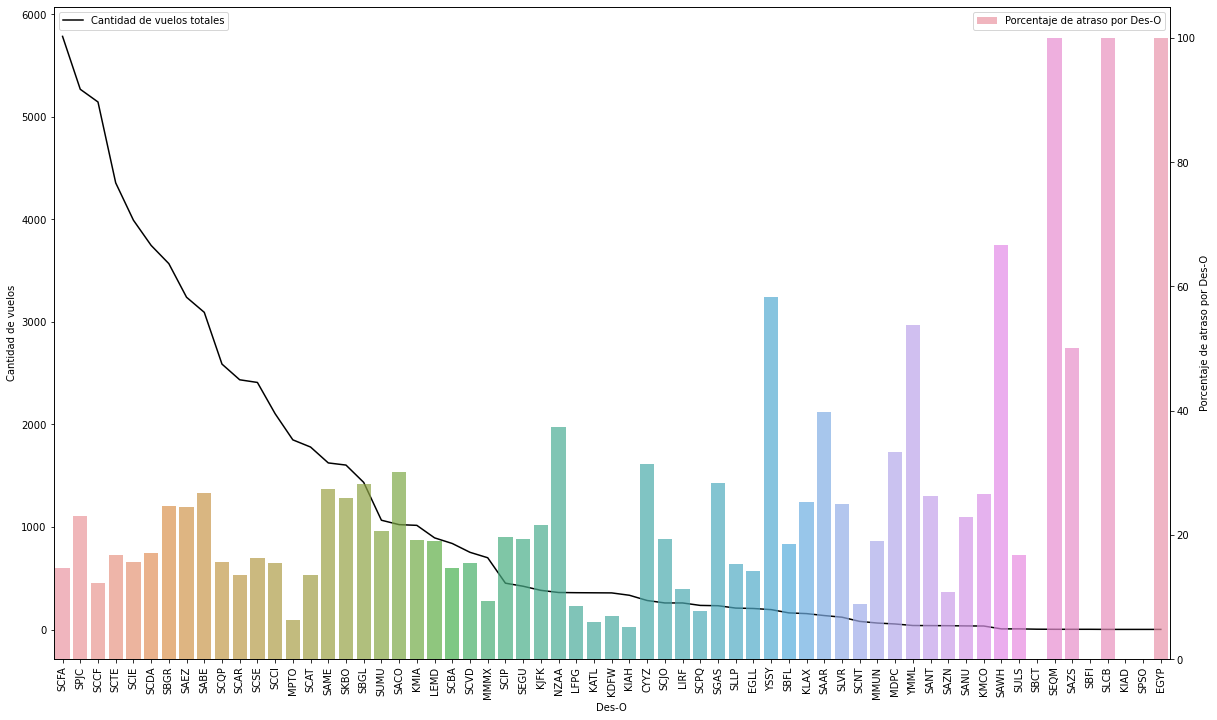

In [55]:
#Verificamos el porcentaje de atraso por destino
atraso('Des-O',20,12)

### Atraso por aerolínea

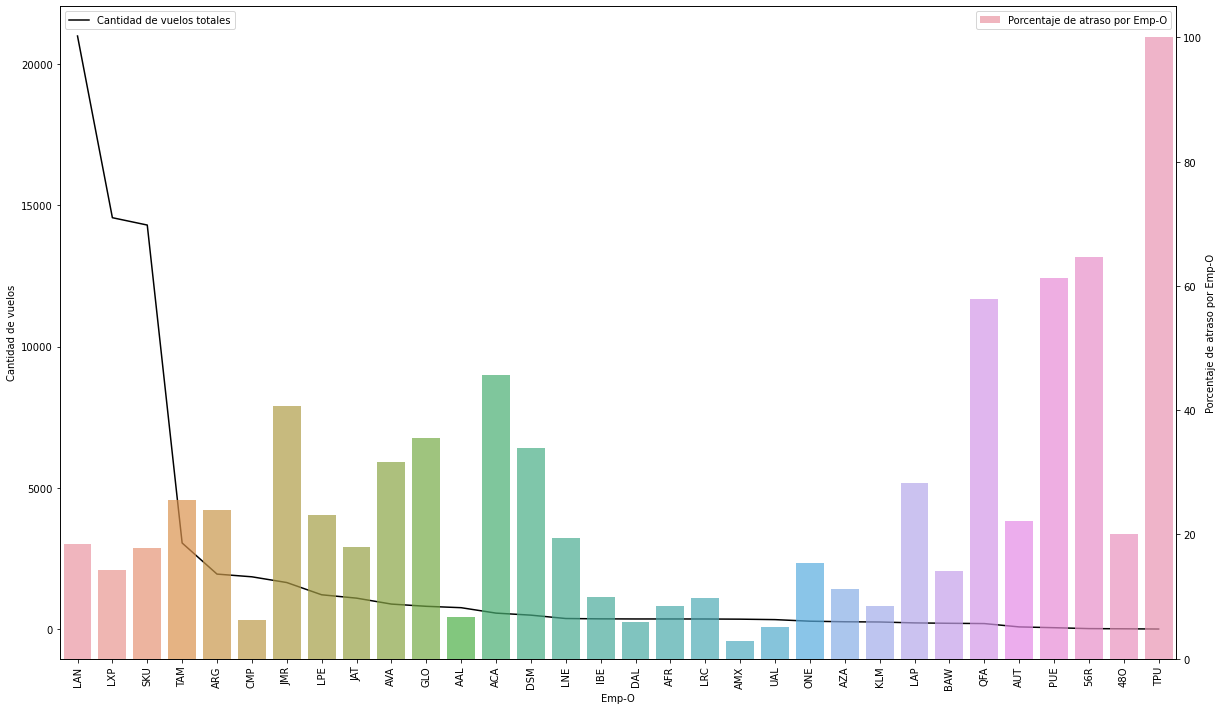

In [56]:
#Revisamos el comportamiento de el porcentaje de atraso por empresa
atraso('Emp-O',20,12)

### Atraso por mes

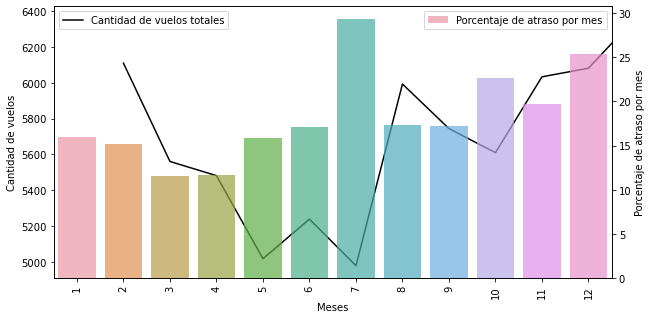

In [57]:
#Generamos un df con la cantidad de vuelos por condicion de atraso y el total de vuelos por mes
df_mes=df.groupby(['MES','atraso_15']).count().reset_index()[['MES','atraso_15','Fecha-I']]
df_mes['total']=0
df_mes
for pos,val in df_mes.iterrows():
    df_mes['total'][pos]=df_mes[df_mes['MES']==val['MES']]['Fecha-I'].sum()
df_mes=df_mes.drop_duplicates('MES',keep='last')
df_mes['porcentaje_atraso']=np.where(df_mes['atraso_15']==1,round((df_mes['Fecha-I']/df_mes['total'])*100,1),round((1-(df_mes['Fecha-I']/df_mes['total']))*100,1))
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=df_mes.sort_values(by='MES',ascending=True), x='MES',y='total',color='black',label='Cantidad de vuelos totales')
ax.set_ylabel("Cantidad de vuelos")
ax.set_xlabel("Meses")
ax2 = ax.twinx()
ax2=sns.barplot(data=df_mes.sort_values(by='MES',ascending=True),x='MES',y='porcentaje_atraso',alpha=0.7,label='Porcentaje de atraso por mes')
ax2.set_ylabel("Porcentaje de atraso por mes")
ax2.set_xlabel("Empresa operadora")
ax.set_xticklabels(df_mes.sort_values(by='MES',ascending=True)['MES'], rotation = 90)
ax2.set_xticklabels(df_mes.sort_values(by='MES',ascending=True)['MES'], rotation = 90)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### Atraso por día de la semana

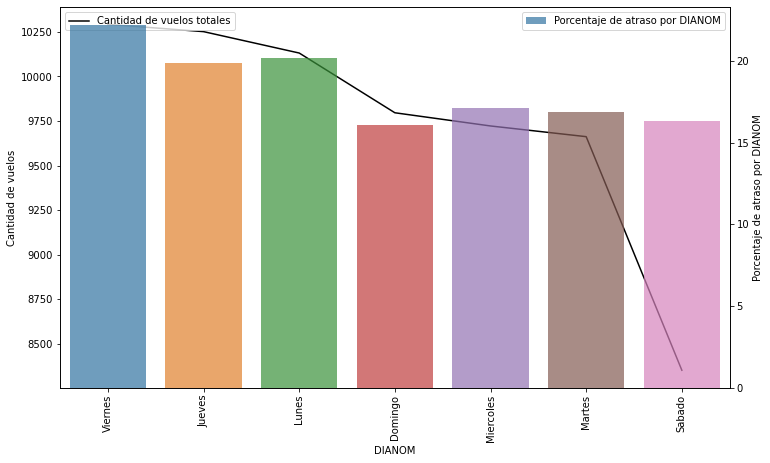

In [58]:
#Graficamos el porcentaje de atraso por día de la semana
atraso('DIANOM',12,7)

### Atraso por temporada del año

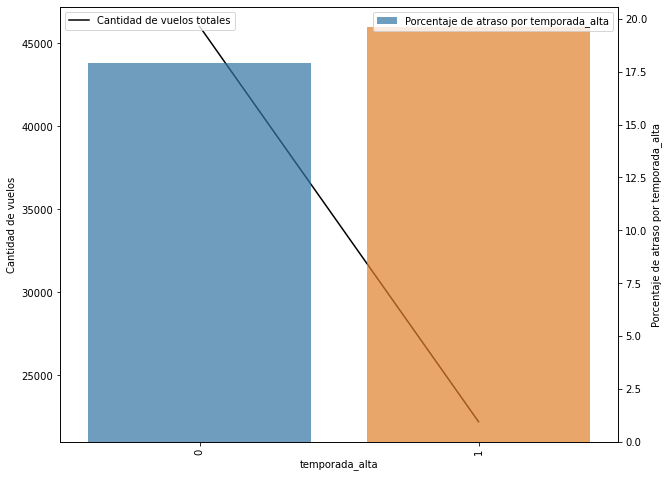

In [59]:
#Graficamos el porcentaje de atraso por temporada
atraso('temporada_alta',10,8)

### Atraso por tipo de vuelo

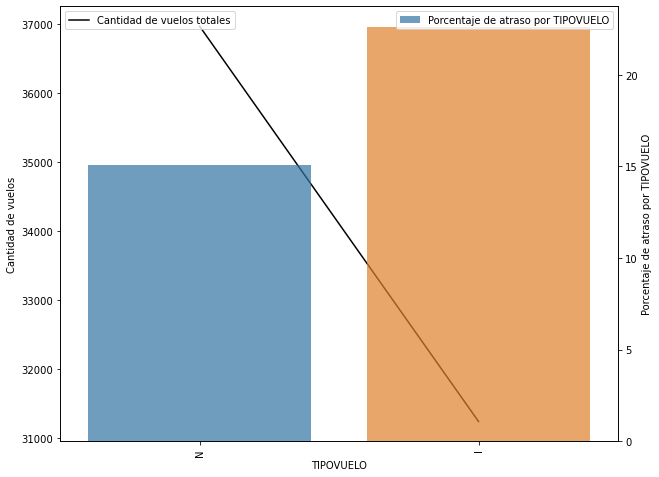

In [60]:
atraso('TIPOVUELO',10,8)

### Conclusiones del análisis de nuevas variables

De las visualizaciones presentadas anteriormente podemos observar que tanto el destino como la aerolínea tienen gran variabilidad respecto al porcentaje de atraso para cada uno de los destinos/aerolineas correspondientes. Es importante destacar que fueron analizadas respecto a las variables de operación dado que son las que creemos que finalmente influyen en el retraso. Además, el mes del año tambien parece ser relevante al momento de explicar los atrasos y creemos que puede tener que ver con condiciones climáticas inherentes a los meses del año ó a volumenes de vuelo en periodos de alta demanda.

Respecto a los días de la semana observamos todos los días tienen un porcentaje de atraso de vuelo entre el 15 y el 20 porciento lo que hace pensar que es puede ser una variable que afecta en menor medida. De igual manera, la temporada del año parece tener una diferencia no tan notoria en términos de porcentaje de atraso por lo que esperamos que no sea una variable tan relevante a la hora de predecir los atrasos.

Finalmente, respecto a el tipo de vuelo vemos que existe casi 10% de diferencia entre ambos conjuntos de datos por lo que pensamos que puede ser relevante al momento de modelar.

## Preguntas 4 y 5 .- Modelamiento y evaluación de desempeño

Lo primero a observar al momento de escoger un modelo es la forma que tiene nuestra variable objetivo (si es que existe). En este caso corresponde a una variable de tipo binaria (atrasado o no atrasado). Dado que esta variable esta etiquetada y es de tipo no numérica nos encontramos ante un problema de clasificación con aprendizaje supervisado. Probaremos distintos modelos cómo arboles de decisión, regresión logística, random forest, naive-bayes y XGboost.

Otro de los elementos a considerar son la variables que utilizaremos para realizar nuestra predicción. En este caso tenemos dos supuestos referentes al tiempo en que se conocen las variables de operación:

1.- Supuesto de que las variables de operación se conocen con una antelación considerable: Si se conocen estas variables con suficiente antelación (periodo de horas o días) podemos asumir que nuestro modelo tiene el tiempo para predecir y alertar a tiempo para tomar decisiones. De ser así podemos utilizar las variables de operación para entrenar a nuestro modelo.

2.- Supuesto de que las variables de operación se conocen en ultima instancia: Si este es el caso, debemos ser capaces de predecir con las variables de programación de los vuelos.


### Supuesto 1

Variables de operación se conocen con antelación (son utilizables en el proceso real):

In [61]:
#Seleccionamos las varibles del df que nos interesan para predecir
df_sup1=df[[
    #'Fecha-I',
    #'Vlo-I',
    #'Ori-I',
    #'Des-I',
    #'Emp-I',
    #'Fecha-O',
    #'Vlo-O',
    'Ori-O',
    'Des-O',
    'Emp-O',
    #'DIA',
    'MES',
    #'AÑO',
    'DIANOM',
    'TIPOVUELO',
    #'OPERA',
    #'SIGLAORI',
    #'SIGLADES', 
    'temporada_alta',
    #'dif_min',
    'atraso_15',
    'periodo_dia'
]]

In [62]:
#Revisamos los tipos de datos
df_sup1.dtypes

Ori-O             object
Des-O             object
Emp-O             object
MES                int64
DIANOM            object
TIPOVUELO         object
temporada_alta     int32
atraso_15          int32
periodo_dia       object
dtype: object

In [63]:
#Observamos a que dato corresponden los DIA, MES y AÑO (corresponden a operación)
df[['Fecha-I','Fecha-O','DIA','MES','AÑO']][df[['Fecha-I','Fecha-O','DIA','MES','AÑO']]['AÑO']==2018]

,Fecha-I,Fecha-O,DIA,MES,AÑO
66918,2017-12-31 23:55:00,2018-01-01 00:02:00,1,1,2018
66947,2017-12-31 23:40:00,2018-01-01 00:12:00,1,1,2018


In [64]:
df_sup1

,Ori-O,Des-O,Emp-O,MES,DIANOM,TIPOVUELO,temporada_alta,atraso_15,periodo_dia
0,SCEL,KMIA,AAL,1,Domingo,I,1,0,noche
1,SCEL,KMIA,AAL,1,Lunes,I,1,0,noche
2,SCEL,KMIA,AAL,1,Martes,I,1,0,noche
3,SCEL,KMIA,AAL,1,Miercoles,I,1,0,noche
4,SCEL,KMIA,AAL,1,Jueves,I,1,0,noche
...,...,...,...,...,...,...,...,...,...
68201,SCEL,SPJC,JAT,12,Viernes,I,1,1,tarde
68202,SCEL,SPJC,JAT,12,Lunes,I,1,1,tarde
68203,SCEL,SPJC,JAT,12,Miercoles,I,1,1,tarde
68204,SCEL,SPJC,JAT,12,Viernes,I,1,0,tarde


In [65]:
#Definiendo variables
X1=df_sup1[['Ori-O', 'Des-O', 'Emp-O', 'MES', 'DIANOM', 'TIPOVUELO',
       'temporada_alta', 'periodo_dia']]
y1=df_sup1[['atraso_15']]

In [66]:
X1

,Ori-O,Des-O,Emp-O,MES,DIANOM,TIPOVUELO,temporada_alta,periodo_dia
0,SCEL,KMIA,AAL,1,Domingo,I,1,noche
1,SCEL,KMIA,AAL,1,Lunes,I,1,noche
2,SCEL,KMIA,AAL,1,Martes,I,1,noche
3,SCEL,KMIA,AAL,1,Miercoles,I,1,noche
4,SCEL,KMIA,AAL,1,Jueves,I,1,noche
...,...,...,...,...,...,...,...,...
68201,SCEL,SPJC,JAT,12,Viernes,I,1,tarde
68202,SCEL,SPJC,JAT,12,Lunes,I,1,tarde
68203,SCEL,SPJC,JAT,12,Miercoles,I,1,tarde
68204,SCEL,SPJC,JAT,12,Viernes,I,1,tarde


In [67]:
#normalización de variables
X1=pd.get_dummies(X1.astype(str),drop_first=True)
X1

,Des-O_EGLL,Des-O_EGYP,Des-O_KATL,Des-O_KDFW,Des-O_KIAD,Des-O_KIAH,Des-O_KJFK,Des-O_KLAX,Des-O_KMCO,Des-O_KMIA,Des-O_LEMD,Des-O_LFPG,Des-O_LIRF,Des-O_MDPC,Des-O_MMMX,Des-O_MMUN,Des-O_MPTO,Des-O_NZAA,Des-O_SAAR,Des-O_SABE,Des-O_SACO,Des-O_SAEZ,Des-O_SAME,Des-O_SANT,Des-O_SANU,Des-O_SAWH,Des-O_SAZN,Des-O_SAZS,Des-O_SBCT,Des-O_SBFI,Des-O_SBFL,Des-O_SBGL,Des-O_SBGR,Des-O_SCAR,Des-O_SCAT,Des-O_SCBA,Des-O_SCCF,Des-O_SCCI,Des-O_SCDA,Des-O_SCFA,Des-O_SCIE,Des-O_SCIP,Des-O_SCJO,Des-O_SCNT,Des-O_SCPQ,Des-O_SCQP,Des-O_SCSE,Des-O_SCTE,Des-O_SCVD,Des-O_SEGU,Des-O_SEQM,Des-O_SGAS,Des-O_SKBO,Des-O_SLCB,Des-O_SLLP,Des-O_SLVR,Des-O_SPJC,Des-O_SPSO,Des-O_SULS,Des-O_SUMU,Des-O_YMML,Des-O_YSSY,Emp-O_56R,Emp-O_AAL,Emp-O_ACA,Emp-O_AFR,Emp-O_AMX,Emp-O_ARG,Emp-O_AUT,Emp-O_AVA,Emp-O_AZA,Emp-O_BAW,Emp-O_CMP,Emp-O_DAL,Emp-O_DSM,Emp-O_GLO,Emp-O_IBE,Emp-O_JAT,Emp-O_JMR,Emp-O_KLM,Emp-O_LAN,Emp-O_LAP,Emp-O_LNE,Emp-O_LPE,Emp-O_LRC,Emp-O_LXP,Emp-O_ONE,Emp-O_PUE,Emp-O_QFA,Emp-O_SKU,Emp-O_TAM,Emp-O_TPU,Emp-O_UAL,MES_10,MES_11,MES_12,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_N,temporada_alta_1,periodo_dia_noche,periodo_dia_tarde
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
68202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
68203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
68204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


#### Train Test

In [68]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=123)  

#### Regresión logística

In [69]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression
clasif_RL1 = LogisticRegression(max_iter=1000)
clasif_RL1.fit(X_train1, y_train1.values.ravel())
y_pred1 = clasif_RL1.predict(X_test1)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,recall_score

In [71]:
accuracy_score(y_test1,y_pred1)

0.8164438189068731

In [72]:
confusion_matrix(y_test1, y_pred1)

array([[13797,   112],
       [ 3018,   125]], dtype=int64)

In [73]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     13909
           1       0.53      0.04      0.07      3143

    accuracy                           0.82     17052
   macro avg       0.67      0.52      0.49     17052
weighted avg       0.77      0.82      0.75     17052



#### Arbol de decisión

In [74]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier


In [75]:
clasif_DT1 = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clasif_DT1.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [76]:
y_pred1 = clasif_DT1.predict(X_test1)

In [77]:
accuracy_score(y_test1,y_pred1)

0.8186722965048088

In [78]:
confusion_matrix(y_test1, y_pred1)

array([[13803,   106],
       [ 2986,   157]], dtype=int64)

In [79]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     13909
           1       0.60      0.05      0.09      3143

    accuracy                           0.82     17052
   macro avg       0.71      0.52      0.50     17052
weighted avg       0.78      0.82      0.75     17052



#### Random Forest

In [80]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [81]:
clasif_RF1 = RandomForestClassifier(max_depth=7, n_estimators = 250)

clasif_RF1.fit(X_train1, y_train1.values.ravel())

RandomForestClassifier(max_depth=7, n_estimators=250)

In [82]:
y_pred1 = clasif_RF1.predict(X_test1)

In [83]:
accuracy_score(y_test1,y_pred1)

0.8156814449917899

In [84]:
confusion_matrix(y_test1, y_pred1)

array([[13909,     0],
       [ 3143,     0]], dtype=int64)

In [85]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13909
           1       0.00      0.00      0.00      3143

    accuracy                           0.82     17052
   macro avg       0.41      0.50      0.45     17052
weighted avg       0.67      0.82      0.73     17052



C:\Users\nicolas.galvez\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicolas.galvez\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicolas.galvez\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [86]:
#XGBoost
import xgboost as xgb

In [87]:
reg1 = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.01)
reg1.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [88]:
y_pred1 = reg1.predict(X_test1)

In [89]:
accuracy_score(y_test1,y_pred1)

0.8190828055360075

In [90]:
confusion_matrix(y_test1, y_pred1)

array([[13873,    36],
       [ 3049,    94]], dtype=int64)

In [91]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13909
           1       0.72      0.03      0.06      3143

    accuracy                           0.82     17052
   macro avg       0.77      0.51      0.48     17052
weighted avg       0.80      0.82      0.74     17052



#### Naive-Bayes

In [92]:
# Naive-Bayes
from sklearn.naive_bayes import GaussianNB

In [93]:
NB1 = GaussianNB()
NB1.fit(X_train1, y_train1.values.ravel())

GaussianNB()

In [94]:
y_pred1 = NB1.predict(X_test1)

In [95]:
accuracy_score(y_test1,y_pred1)

0.7725193525686137

In [96]:
confusion_matrix(y_test1, y_pred1)

array([[12418,  1491],
       [ 2388,   755]], dtype=int64)

In [97]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     13909
           1       0.34      0.24      0.28      3143

    accuracy                           0.77     17052
   macro avg       0.59      0.57      0.57     17052
weighted avg       0.75      0.77      0.76     17052



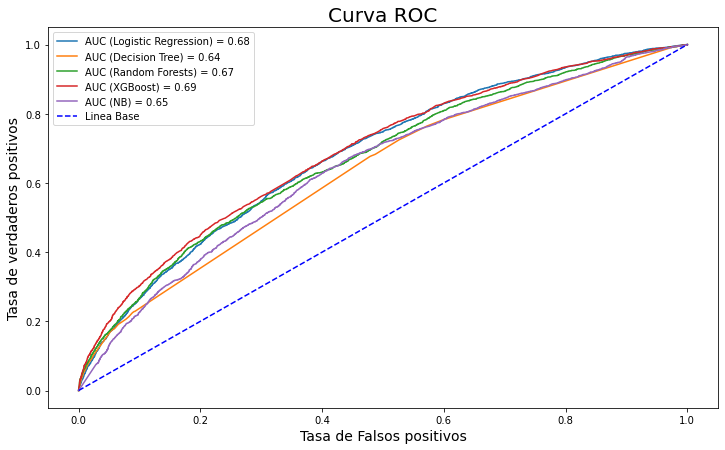

In [98]:
#ROC-AUC

from sklearn.metrics import roc_auc_score, roc_curve

y_pred1 = clasif_RL1.predict_proba(X_test1)
y_pred1 = y_pred1[:, 1]
auc_lr = roc_auc_score(y_test1, y_pred1)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test1, y_pred1)

y_pred1 = clasif_DT1.predict_proba(X_test1)
y_pred1 = y_pred1[:, 1]
auc_dt = roc_auc_score(y_test1, y_pred1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test1, y_pred1)

y_pred1 = clasif_RF1.predict_proba(X_test1)
y_pred1 = y_pred1[:, 1]
auc_rf = roc_auc_score(y_test1, y_pred1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_pred1)

y_pred1 = reg1.predict_proba(X_test1)
y_pred1 = y_pred1[:, 1]
auc_xg = roc_auc_score(y_test1, y_pred1)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test1, y_pred1)

y_pred1 = NB1.predict_proba(X_test1)
y_pred1 = y_pred1[:, 1]
auc_nb = roc_auc_score(y_test1, y_pred1)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test1, y_pred1)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (NB) = {auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Linea Base')
plt.title('Curva ROC', size=20)
plt.xlabel('Tasa de Falsos positivos', size=14)
plt.ylabel('Tasa de verdaderos positivos', size=14)
plt.legend();

### Conclusiones Supuesto 1

De los modelos probados anteriormente tenemos que en términos de exactitud el mejor modelo es XGBoost con una métrica de 0.819. Sin embargo de acuerdo a necesidades del negocio tambien es importante considerar la variable recall para observar los falsos positivos de cada modelo. En este caso los falsos negativos(falsos atrasos) pueden levantar alertas de vuelos que en realidad no se retrasaran por lo que se levante un protocolo para brindar soluciones que monetariamente pueden ser muy costosas. Es por ello que tambien resulta relevante destacar a Naive-Bayes que si bien tiene la exactitud mas pequeña, tiene la mayor puntuación en recall. Finalmente la decisión de qué pesa más en este negocio y que modelo debiesemos usar para abordar la problemática le corresponde a un experto del negocio de acuerdo a si quiere mejorar la exactitud o disminuir los falsos negativos.

Para reforzar la idea anterior realizamos una gráfica de ROC-AUC donde observamos que el modelo que destaca en cuando a AUC es XGBoost con 0.69. Esto indica que es el mejor modelo minimizando los falsos positivos y negativos.

### Supuesto 2

Variables de operación no se conocen con antelación (no son utilizables en el proceso real):

In [99]:
#Seleccionamos las varibles del df que nos interesan para predecir
df_sup2=df[[
    'Fecha-I',
    #'Vlo-I',
    'Ori-I',
    'Des-I',
    'Emp-I',
    #'Fecha-O',
    #'Vlo-O',
    #'Ori-O',
    #'Des-O',
    'Emp-O',
    #'DIA',
    #'MES',
    #'AÑO',
    #'DIANOM',
    'TIPOVUELO',
    #'OPERA',
    #'SIGLAORI',
    #'SIGLADES', 
    'temporada_alta',
    #'dif_min',
    'atraso_15',
    'periodo_dia'
]]

In [100]:
df_sup2

,Fecha-I,Ori-I,Des-I,Emp-I,Emp-O,TIPOVUELO,temporada_alta,atraso_15,periodo_dia
0,2017-01-01 23:30:00,SCEL,KMIA,AAL,AAL,I,1,0,noche
1,2017-01-02 23:30:00,SCEL,KMIA,AAL,AAL,I,1,0,noche
2,2017-01-03 23:30:00,SCEL,KMIA,AAL,AAL,I,1,0,noche
3,2017-01-04 23:30:00,SCEL,KMIA,AAL,AAL,I,1,0,noche
4,2017-01-05 23:30:00,SCEL,KMIA,AAL,AAL,I,1,0,noche
...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,SCEL,SPJC,JAT,JAT,I,1,1,tarde
68202,2017-12-25 14:55:00,SCEL,SPJC,JAT,JAT,I,1,1,tarde
68203,2017-12-27 14:55:00,SCEL,SPJC,JAT,JAT,I,1,1,tarde
68204,2017-12-29 14:55:00,SCEL,SPJC,JAT,JAT,I,1,0,tarde


Hemos escogido estas variables pensado en calcular un porcentaje de vuelos efectivos de cada empresa programada (que se calculará versus la empresa operada). Además, debemos considerar la fecha de vuelo programada y recalcular las variables DIASNOM y MES para casos programados. Finalmente decidimos que el destino tiene variaciones muy pequeñas respecto a otras variables por lo que no debiese haber diferencia significativa entre utilizar la programada o la operada

In [101]:
#Creación de variable Mes 
df_sup2['MES']=df_sup2['Fecha-I'].apply(lambda x: x.month)

In [102]:
#Creación de variable dia
df_sup2['DIA']=df_sup2['Fecha-I'].apply(lambda x: x.weekday())

In [103]:
df_sup2.replace({'DIA': {0: 'Lunes', 1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}},inplace=True)

In [104]:
df_emp_prog=df_sup2.groupby(['Emp-I']).count().reset_index()[['Emp-I','Fecha-I']]
df_emp_prog.columns=['Empresa','Cantidad_prog']

In [105]:
df_emp_op=df_sup2.groupby(['Emp-O']).count().reset_index()[['Emp-O','Fecha-I']]
df_emp_op.columns=['Empresa','Cantidad_op']

In [106]:
df_emp=df_emp_prog.merge(df_emp_op,how='left',on='Empresa')

In [107]:
df_emp.fillna(0,inplace=True)

In [108]:
#cálculo de porcentaje de vuelos operados por compañia
df_emp['porcentaje_vuelos_operados']=df_emp['Cantidad_op']/df_emp['Cantidad_prog']

In [109]:
df_emp.columns=['Emp-I', 'Cantidad_prog', 'Cantidad_op',
       'porcentaje_vuelos_operados']
df_emp

,Emp-I,Cantidad_prog,Cantidad_op,porcentaje_vuelos_operados
0,AAL,757,757.0,1.000000
1,ACA,565,565.0,1.000000
2,AFR,358,358.0,1.000000
3,AMX,351,351.0,1.000000
4,ARG,1949,1946.0,0.998461
5,AUT,74,77.0,1.040541
6,AVA,1152,885.0,0.768229
7,AZA,259,259.0,1.000000
8,BAW,205,205.0,1.000000
9,CMP,1850,1850.0,1.000000


In [110]:
#union con dataset inicial de suposicion 2
df_sup2=df_sup2.merge(df_emp[['Emp-I','porcentaje_vuelos_operados']],how='left',on='Emp-I')

In [111]:
df_sup2[['Des-I', 'Emp-I','TIPOVUELO',
       'temporada_alta', 'atraso_15', 'periodo_dia', 'MES', 'DIA',
       'porcentaje_vuelos_operados']]

,Des-I,Emp-I,TIPOVUELO,temporada_alta,atraso_15,periodo_dia,MES,DIA,porcentaje_vuelos_operados
0,KMIA,AAL,I,1,0,noche,1,Domingo,1.0
1,KMIA,AAL,I,1,0,noche,1,Lunes,1.0
2,KMIA,AAL,I,1,0,noche,1,Martes,1.0
3,KMIA,AAL,I,1,0,noche,1,Miercoles,1.0
4,KMIA,AAL,I,1,0,noche,1,Jueves,1.0
...,...,...,...,...,...,...,...,...,...
68201,SPJC,JAT,I,1,1,tarde,12,Viernes,1.0
68202,SPJC,JAT,I,1,1,tarde,12,Lunes,1.0
68203,SPJC,JAT,I,1,1,tarde,12,Miercoles,1.0
68204,SPJC,JAT,I,1,0,tarde,12,Viernes,1.0


In [112]:
X2=df_sup2[['Des-I', 'Emp-I','TIPOVUELO',
       'temporada_alta','periodo_dia', 'MES', 'DIA',
       'porcentaje_vuelos_operados']]
y2=df_sup2[['atraso_15']]

In [113]:
X2['MES']=X2['MES'].astype(str)

In [114]:
#normalización
X2=pd.get_dummies(X2,drop_first=True)

In [115]:
from sklearn import preprocessing

In [116]:
#normalización
X2=preprocessing.normalize(X2)

#### Train Test

In [117]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=123)  

#### Regresión Logística

In [118]:
#Regresion logistica
clasif_RL2 = LogisticRegression(max_iter=1000)
clasif_RL2.fit(X_train2, y_train2.values.ravel())
y_pred2 = clasif_RL2.predict(X_test2)

In [119]:
accuracy_score(y_test2,y_pred2)

0.8170889045273282

In [120]:
confusion_matrix(y_test2, y_pred2)

array([[13844,    65],
       [ 3054,    89]], dtype=int64)

In [121]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13909
           1       0.58      0.03      0.05      3143

    accuracy                           0.82     17052
   macro avg       0.70      0.51      0.48     17052
weighted avg       0.77      0.82      0.74     17052



#### Árbol de decisión

In [122]:
#Arbol de decision
clasif_DT2 = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clasif_DT2.fit(X_train2, y_train2)
y_pred2=clasif_DT2.predict(X_test2)

In [123]:
accuracy_score(y_test2,y_pred2)

0.8178512784424115

In [124]:
confusion_matrix(y_test2, y_pred2)

array([[13784,   125],
       [ 2981,   162]], dtype=int64)

In [125]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     13909
           1       0.56      0.05      0.09      3143

    accuracy                           0.82     17052
   macro avg       0.69      0.52      0.50     17052
weighted avg       0.77      0.82      0.75     17052



#### Random Forest

In [126]:
#Random Forest
clasif_RF2 = RandomForestClassifier(max_depth=7, n_estimators = 250)
clasif_RF2.fit(X_train2, y_train2.values.ravel())
y_pred2=clasif_RF2.predict(X_test2)

In [127]:
accuracy_score(y_test2,y_pred2)

0.8162678864649308

In [128]:
confusion_matrix(y_test2, y_pred2)

array([[13901,     8],
       [ 3125,    18]], dtype=int64)

In [129]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13909
           1       0.69      0.01      0.01      3143

    accuracy                           0.82     17052
   macro avg       0.75      0.50      0.46     17052
weighted avg       0.79      0.82      0.74     17052



#### XGBoost

In [130]:
#XGBoost
reg2 = xgb.XGBClassifier(n_estimators = 400, learning_rate = 0.01)
reg2.fit(X_train2, y_train2)
y_pred2=reg2.predict(X_test2)

In [131]:
accuracy_score(y_test2,y_pred2)

0.8200797560403472

In [132]:
confusion_matrix(y_test2, y_pred2)

array([[13849,    60],
       [ 3008,   135]], dtype=int64)

In [133]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13909
           1       0.69      0.04      0.08      3143

    accuracy                           0.82     17052
   macro avg       0.76      0.52      0.49     17052
weighted avg       0.80      0.82      0.75     17052



#### Naive-Bayes

In [134]:
#Naive-Bayes
NB2 = GaussianNB()
NB2.fit(X_train2, y_train2.values.ravel())
y_pred2=NB2.predict(X_test2)

In [135]:
accuracy_score(y_test2,y_pred2)

0.754163734459301

In [136]:
confusion_matrix(y_test2, y_pred2)

array([[12008,  1901],
       [ 2291,   852]], dtype=int64)

In [137]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     13909
           1       0.31      0.27      0.29      3143

    accuracy                           0.75     17052
   macro avg       0.57      0.57      0.57     17052
weighted avg       0.74      0.75      0.75     17052



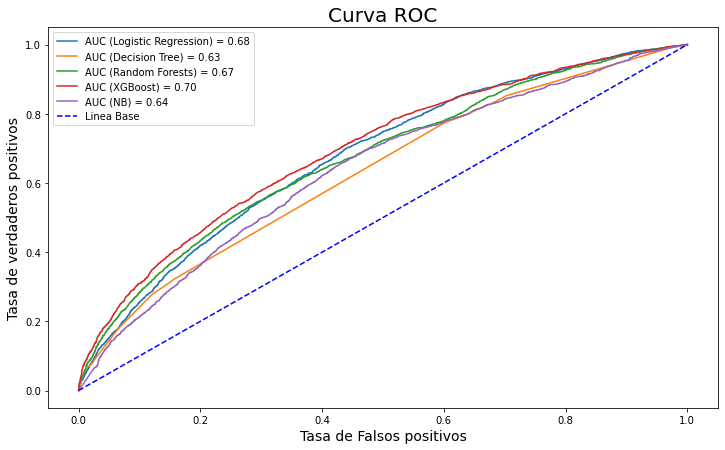

In [138]:
#ROC-AUC

y_pred2 = clasif_RL2.predict_proba(X_test2)
y_pred2 = y_pred2[:, 1]
auc_lr = roc_auc_score(y_test2, y_pred2)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test2, y_pred2)

y_pred2 = clasif_DT2.predict_proba(X_test2)
y_pred2 = y_pred2[:, 1]
auc_dt = roc_auc_score(y_test2, y_pred2)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test2, y_pred2)

y_pred2 = clasif_RF2.predict_proba(X_test2)
y_pred2 = y_pred2[:, 1]
auc_rf = roc_auc_score(y_test2, y_pred2)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test2, y_pred2)

y_pred2 = reg2.predict_proba(X_test2)
y_pred2 = y_pred2[:, 1]
auc_xg = roc_auc_score(y_test2, y_pred2)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test2, y_pred2)

y_pred2 = NB2.predict_proba(X_test2)
y_pred2 = y_pred2[:, 1]
auc_nb = roc_auc_score(y_test2, y_pred2)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test2, y_pred2)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (NB) = {auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Linea Base')
plt.title('Curva ROC', size=20)
plt.xlabel('Tasa de Falsos positivos', size=14)
plt.ylabel('Tasa de verdaderos positivos', size=14)
plt.legend();

#### Conclusiones Supuesto 2

En primera instancia notamos que el método de generar una variable de porcentaje de vuelos operados tuvo buen resultado mostrando que podemos predecir a partir de las variables programadas manteniendo niveles similares de exactitud a los que obtuvimos con las variables de operación. Vemos que XGBoost sigue siendo el que mejor resultado tiene con una exactitud de 0.082 y aumentando el recall respecto al supuesto 1. Además, observamos que XGBoost sigue siendo el mejor modelo si observamos el AUC obteniendo 0.70 de puntaje.

#### Análisis de sensibilidad

Otro aspecto interesante a estudiar es que variables son las que más afectan a nuestro modelo. Para ello haremos un análisis de sensibilidad tomando un dato aleatorio, que en este caso sera la primera fila y variaremos cada una de los elementos que componen a nuestro vuelo de manera de observar empíricamente que variables definen con mayor fuerza el atraso del vuelo. Para este análisis utilizarmos el modelo del supuesto 1 (variables de operación) por su simplicidad al momento de utilizarlas y el modelo con mejor exactitud que obtuvimos (XGBoost).

In [139]:
#Observamos la variable que utilizaremos
X1.iloc[0]

Des-O_EGLL           0
Des-O_EGYP           0
Des-O_KATL           0
Des-O_KDFW           0
Des-O_KIAD           0
                    ..
DIANOM_Viernes       0
TIPOVUELO_N          0
temporada_alta_1     1
periodo_dia_noche    1
periodo_dia_tarde    0
Name: 0, Length: 114, dtype: uint8

In [140]:
#observamos el dato y lo correspondemos con indices para poder utilizarlos mas adelante. 
dato_prueba_S1=np.array(X1.iloc[0])
df_visual=pd.DataFrame(X1.iloc[0])
df_visual['numero_caracteristica']=range(0,114)
df_visual.T

,Des-O_EGLL,Des-O_EGYP,Des-O_KATL,Des-O_KDFW,Des-O_KIAD,Des-O_KIAH,Des-O_KJFK,Des-O_KLAX,Des-O_KMCO,Des-O_KMIA,Des-O_LEMD,Des-O_LFPG,Des-O_LIRF,Des-O_MDPC,Des-O_MMMX,Des-O_MMUN,Des-O_MPTO,Des-O_NZAA,Des-O_SAAR,Des-O_SABE,Des-O_SACO,Des-O_SAEZ,Des-O_SAME,Des-O_SANT,Des-O_SANU,Des-O_SAWH,Des-O_SAZN,Des-O_SAZS,Des-O_SBCT,Des-O_SBFI,Des-O_SBFL,Des-O_SBGL,Des-O_SBGR,Des-O_SCAR,Des-O_SCAT,Des-O_SCBA,Des-O_SCCF,Des-O_SCCI,Des-O_SCDA,Des-O_SCFA,Des-O_SCIE,Des-O_SCIP,Des-O_SCJO,Des-O_SCNT,Des-O_SCPQ,Des-O_SCQP,Des-O_SCSE,Des-O_SCTE,Des-O_SCVD,Des-O_SEGU,Des-O_SEQM,Des-O_SGAS,Des-O_SKBO,Des-O_SLCB,Des-O_SLLP,Des-O_SLVR,Des-O_SPJC,Des-O_SPSO,Des-O_SULS,Des-O_SUMU,Des-O_YMML,Des-O_YSSY,Emp-O_56R,Emp-O_AAL,Emp-O_ACA,Emp-O_AFR,Emp-O_AMX,Emp-O_ARG,Emp-O_AUT,Emp-O_AVA,Emp-O_AZA,Emp-O_BAW,Emp-O_CMP,Emp-O_DAL,Emp-O_DSM,Emp-O_GLO,Emp-O_IBE,Emp-O_JAT,Emp-O_JMR,Emp-O_KLM,Emp-O_LAN,Emp-O_LAP,Emp-O_LNE,Emp-O_LPE,Emp-O_LRC,Emp-O_LXP,Emp-O_ONE,Emp-O_PUE,Emp-O_QFA,Emp-O_SKU,Emp-O_TAM,Emp-O_TPU,Emp-O_UAL,MES_10,MES_11,MES_12,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_N,temporada_alta_1,periodo_dia_noche,periodo_dia_tarde
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
numero_caracteristica,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113


In [141]:
#probabilidad de no atraso/atraso del dato original
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

Para cada uno de los análisis tomaremos alguna variable que nos interese observar y modificaremos sus parametros para obsevar cuanto cambia la probabilidad de atraso.

In [142]:
#Análisis de temporada alta
#Actualmente el vuelo es de temporada alta
#Cambiaremos el dato a temporada baja
dato_prueba_S1[111]=0
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8898316, 0.1101684]], dtype=float32)

Observamos como al hacer cambios en la temporada varia levemente a ser menos propenso a atraso(0.003).

In [143]:
#Análisis de periodo dia
#noche
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [144]:
#tarde
dato_prueba_S1[112]=0
dato_prueba_S1[113]=1
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8684392 , 0.13156082]], dtype=float32)

In [145]:
#día
dato_prueba_S1[112]=0
dato_prueba_S1[113]=0
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

De las pruebas realizadas anteriormente vemos que al cambiar a un vuelo de tarde aumenta la probabilidad de atraso (0.021).

In [146]:
#Análisis vuelo nacional
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [147]:
dato_prueba_S1[110]=1
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.865925  , 0.13407497]], dtype=float32)

Al ser un vuelo nacional tiene mas probabilidades de retrasarse (0.024)

In [148]:
#Análisis dia de la semana
#domingo
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(dato_prueba_S1.reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [149]:
var=[]
iter=[]
for i in range(104,110):
    dato_prueba_S1=np.array(X1.iloc[0])
    dato_prueba_S1[i]=1
    var.append((reg1.predict_proba(dato_prueba_S1.reshape((1,-1))))[0,0])
    iter.append(i)
pd.DataFrame([var,iter]).T

,0,1
0,0.840225,104.0
1,0.889635,105.0
2,0.890244,106.0
3,0.889565,107.0
4,0.889565,108.0
5,0.846197,109.0


El día de la semana afecta al momento de predecir de nuestro modelo. En específico los días que mas afectan son los viernes y los jueves causando una diferencia máxima los jueves de 0.04 versus nuestra base que corresponde al dia domingo.

In [150]:
#análisis mes
#Enero
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(np.array(dato_prueba_S1).reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [151]:
var=[]
iter=[]
for i in range(93,104):
    dato_prueba_S1=np.array(X1.iloc[0])
    dato_prueba_S1[i]=1
    var.append((reg1.predict_proba(dato_prueba_S1.reshape((1,-1))))[0,0])
    iter.append(i)
pd.DataFrame([var,iter]).T

,0,1
0,0.883751,93.0
1,0.889046,94.0
2,0.868127,95.0
3,0.884975,96.0
4,0.915652,97.0
5,0.908755,98.0
6,0.889565,99.0
7,0.892089,100.0
8,0.855670,101.0
9,0.889565,102.0


Observamos cómo los meses afectan a la predicción de nuestro modelo donde Julio tiene la peor performance (baja 0.03) y Marzo aumenta la probabilidad de lograr vuelos a tiempo (aumenta 0.03)

In [152]:
#análisis empresa
#AAL
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(np.array(dato_prueba_S1).reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [153]:
var=[]
iter=[]
for i in range(62,93):
    dato_prueba_S1=np.array(X1.iloc[0])
    dato_prueba_S1[63]=0
    dato_prueba_S1[i]=1
    var.append((reg1.predict_proba(dato_prueba_S1.reshape((1,-1))))[0,0])
    iter.append(i)
pd.DataFrame([var,iter]).T

,0,1
0,0.791765,62.0
1,0.889565,63.0
2,0.602448,64.0
3,0.791765,65.0
4,0.900458,66.0
5,0.791765,67.0
6,0.791765,68.0
7,0.803662,69.0
8,0.791765,70.0
9,0.791765,71.0


Observamos como al cambiar a una empresa aleatoria nos cambia tremendamente en rendimiento de nuestro modelo variando aumentando la probabilidad de atraso en 0.29.

In [154]:
#análisis destino
#KMIA
dato_prueba_S1=np.array(X1.iloc[0])
reg1.predict_proba(np.array(dato_prueba_S1).reshape((1,-1)))

array([[0.8895648 , 0.11043517]], dtype=float32)

In [155]:
var=[]
iter=[]
for i in range(0,62):
    dato_prueba_S1=np.array(X1.iloc[0])
    dato_prueba_S1[9]=0
    dato_prueba_S1[i]=1
    var.append((reg1.predict_proba(dato_prueba_S1.reshape((1,-1))))[0,0])
    iter.append(i)
pd.DataFrame([var,iter])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0.889565,0.889565,0.910269,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.901572,0.889565,0.889565,0.890422,0.889565,0.931714,0.778404,0.872126,0.892074,0.861575,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.88585,0.889565,0.889383,0.889565,0.889565,0.879686,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.889565,0.87708,0.70116
1,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.00000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.00000,61.00000


Observamos que el destino tambien tiene un impacto significativo pudiendo llegar incluso a hacer una diferencia como es el caso de YSSY de aumento de probabilidad de atraso en 0.18.

#### Conclusiones del análisis de sensibilidad

Observamos que al modificar distintas variables nuestro modelo respondió variando en mayor o menor medida la probabilidad de atraso. Si ordenamos de acuerdo a los resultados obtenidos tenemos la siguiente tabla.

| Variable| Modificación de probabilidad atraso respecto a caso original(max)| 
| --- | --- | 
| Empresa | 0.29 | 
| Destino | 0.18 | 
| Día de la semana | 0.04 | 
| Mes | 0.03 | 
| Periodo Día | 0.02 | 
| Temporada | 0.003 | 

Es así como la variable que mas afecta en que un vuelo se atrase corresponde a la empresa ejecutora, seguida de el destino y el día de la semana.

## Pregunta 5.- Conclusiones Finales y recomendaciones

Del análisis realizado y respondiendo a cada uno de los puntos solicitados podemos enumerar lo siguiente:

#### Análisis exploratorio
    - De acuerdo al análisis exploratorio realizado nos dimos cuenta que muchos de los vuelos programados con una empresa no eran ejecutados por la misma. En LAN por ejemplo sólo un 55% eran ejecutados por ellos, mientras que los restantes y para otros casos también, eran tomados por empresas que incluso no estaban en la programación. Podemos pensar que quizás existen empresas que trabajan en la modalidad de cubrir vuelos de otras empresas.
    
    - Esto ocurria tambien con otras variables como número de vuelo y destino. Para nuestros posteriores análisis decidimos no utilizar el número de vuelo porque creemos que no aporta y en el caso del destino las variaciones eran pequeñas de acuerdo a lo programado.
    
    -Otras variables relevantes a considerar corresponden a los días de la semana donde los días que ocurren mas vuelos son los Jueves, Viernes y Lunes además del tipo de vuelo.
    
#### Variables adicionales
    
    - Fuimos capaces de generar las variables solicitadas y a partir de un análisis de éstas planteamos las hipótesis de que los destinos y las empresas ejecutoras eran importantes para predecir el atraso dado que tenian gran variabilidad del porcentaje de atraso entre los destinos y empresas que los componian. 
    
    - Asimismo, notamos cómo las variables cómo los días de la semana y temporada del año tenian poca variabilidad asi que planteamos que podía tener menor relevancia en nuestro modelo.

#### Modelamiento

    - Para realizar el modelamiento trabajamos bajo dos supuestos, el primero fue que las variables de operación son informadas a tiempo para tomar decisiones relevantes y planificar. El segundo supuesto hace referencia a todo lo contrario, las variables de operación son informadas en última instancia lo que se traduce en que debemos predecir a partir de las variables programadas.
    
    - En ambos casos, realizamos modelos de regresión logística, arboles de decision, random forest, XGBoost y Naive-Bayes para observar los resultados de cada uno. Tanto cómo para el supuesto 1 como para el supuesto 2 tuvimos que en términos de exactitud XGBoost era el mejor modelo.
    
    -  Además, si consideramos la importancia para nuestro problema de entregar falsos negativos o falsos positivos para planificación de actividades y logística, debemos darle importancia la medida ROC-AUC que nos muestra que tan bien logra minimizar los FP y FN nuestro modelo. Es así como creemos que si deseamos darle importancia a no generar tantas predicciones erradas debemos considerar a XGBoost cómo el módelo a escoger dado que obtiene el mejor puntaje AUC.
    
#### Variables que influyen

    - A partir de un análisis de sensibilidad que realizamos variando manualmente los parámetros de una variable aleatoria escogida notamos cómo nuestras hipótesis planteadas en "variables adicionales" fueron en su mayoría acertadas. Destacan en niveles de importancia la empresa y el destino mientras que día de la semana, mes, temporada y periodo del día aportan en menor medida. Es importante destacar que este análisis fue realizado para el modelo XGBoost y bajo el supuesto 1, dado que tuvo la mejor exactitud dentro del supuesto 1 y este supuesto nos permite analizar las variables reales que influyen en el vuelo.
    
#### Oportunidades de mejora

    - Seria interesante observar como afectan otras variables que no encuentran en el dataset y que creemos que son importantes al momento de definir el atraso de un vuelo como podría ser la condición climática del origen y del destino.
    
    - Otro acercamiento para lograr una mejora en los resultados es modificar los hiperparámetros de cada uno de los modelos ó del modelo mejor puntuado para obtener mejores predicciones.
    
    -Además pensamos que modificar el límite de corte de nuestros modelos podría entregarnos una forma de mejorar las predicciones y disminuir la tasa de error de falsos positivos y negativos.
    
    -Finalmente incoorporar otros modelos a nuestro análisis tambien puede aportar a encontrar una manera de predecir de mejor manera el atraso de los vuelos.